In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from instance_sensitive_metrics import panoptic_dice # One to One
from instance_sensitive_metrics import cc_dice # Psuedo One to One
from instance_sensitive_metrics import lesion_wise_dice # Many to 1
from instance_sensitive_metrics import cluster_dice # Many to Many

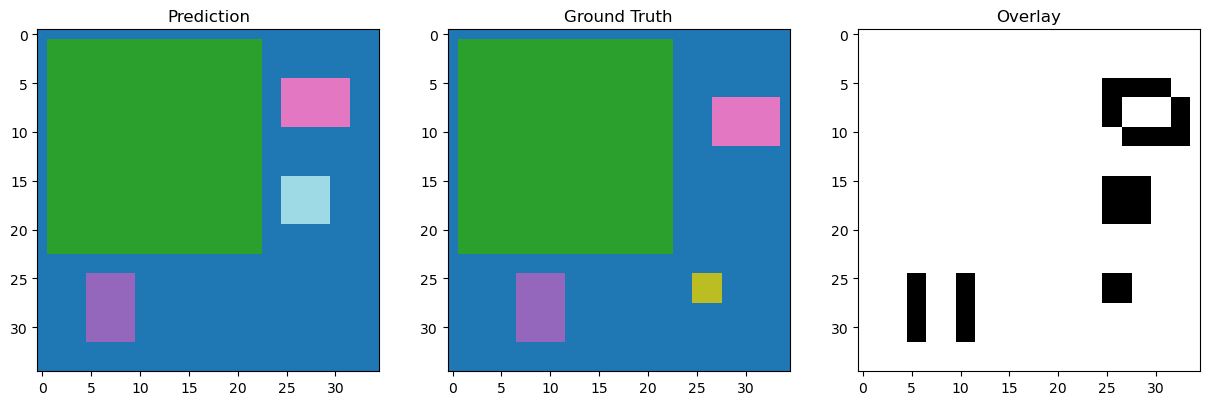

In [3]:
# Sample Data
pred = torch.zeros((35, 35)).cuda()
gt = torch.zeros((35, 35)).cuda()

# Class 1 - Both pred and gt have the same region
pred[1:23, 1:23] = 1
gt[1:23, 1:23] = 1

# Class 2 - Different regions in pred and gt
pred[25:32, 5:10] = 2
gt[25:32, 7:12] = 2  # Slight offset for partial overlap

# Class 3 - Completely different regions
pred[5:10, 25:32] = 3
gt[7:12, 27:34] = 3

# Class 4 - No prediction, only ground truth
gt[25:28, 25:28] = 4

# Class 5 - Only prediction, no ground truth
pred[15:20, 25:30] = 5

# Define a fixed colormap and normalization
num_classes = 6  # Including 0 (background)
colors = plt.cm.tab20(np.linspace(0, 1, num_classes))  # Generate distinct colors
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=np.arange(num_classes + 1) - 0.5, ncolors=num_classes)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(pred.cpu(), cmap=cmap, norm=norm)
ax[0].set_title('Prediction')
ax[1].imshow(gt.cpu(), cmap=cmap, norm=norm)
ax[1].set_title('Ground Truth')
ax[2].imshow(pred.cpu() == gt.cpu(), cmap='gray')
ax[2].set_title('Overlay')

plt.show()

In [4]:
import pandas as pd

# Helper function to compare scores across metrics
panoptic_dice_score = panoptic_dice(pred, gt, metric="dice")
cc_dice_score = cc_dice(pred, gt, metric="dice")
cluster_dice_score = cluster_dice(pred, gt, metric="dice")
lesion_wise_dice_score = lesion_wise_dice(pred, gt, metric="dice")

# Tabulate results (Turn Tensor to float for display)
overall_scores = pd.DataFrame({
    "Metric": ["CC Dice", "Panoptic Dice", "Lesion-wise Dice", "Cluster Dice"],
    "Overall Score": [cc_dice_score.item(), panoptic_dice_score, lesion_wise_dice_score.item(), cluster_dice_score.item()]
})

print(overall_scores.to_string(index=False) + "\n")

          Metric  Overall Score
         CC Dice       0.405714
   Panoptic Dice       0.405714
Lesion-wise Dice       0.405714
    Cluster Dice       0.405714



In [5]:
# Helper function to compare scores across metrics
panoptic_dice_score = panoptic_dice(pred, gt, metric="iou")
cc_dice_score = cc_dice(pred, gt, metric="iou")
cluster_dice_score = cluster_dice(pred, gt, metric="iou")
lesion_wise_dice_score = lesion_wise_dice(pred, gt, metric="iou")

# Tabulate results (Turn Tensor to float for display)
overall_scores = pd.DataFrame({
    "Metric": ["CC Dice", "Panoptic Dice", "Lesion-wise Dice", "Cluster Dice"],
    "Overall Score": [cc_dice_score.item(), panoptic_dice_score, lesion_wise_dice_score.item(), cluster_dice_score.item()]
})

print(overall_scores.to_string(index=False) + "\n")

          Metric  Overall Score
         CC Dice        0.34026
   Panoptic Dice        0.34026
Lesion-wise Dice        0.34026
    Cluster Dice        0.34026



In [6]:
# Helper function to compare scores across metrics
panoptic_dice_score = panoptic_dice(pred, gt, metric="nsd")
cc_dice_score = cc_dice(pred, gt, metric="nsd")
cluster_dice_score = cluster_dice(pred, gt, metric="nsd")
lesion_wise_dice_score = lesion_wise_dice(pred, gt, metric="nsd")

# Tabulate results (Turn Tensor to float for display)
overall_scores = pd.DataFrame({
    "Metric": ["CC Dice", "Panoptic Dice", "Lesion-wise Dice", "Cluster Dice"],
    "Overall Score": [cc_dice_score.item(), panoptic_dice_score, lesion_wise_dice_score.item(), cluster_dice_score.item()]
})

print(overall_scores.to_string(index=False) + "\n")

          Metric  Overall Score
         CC Dice           0.36
   Panoptic Dice           0.36
Lesion-wise Dice           0.36
    Cluster Dice           0.36

